In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot
import calendar

In [163]:
f  = "../data/temixco2021"
df = pd.read_csv(f, index_col=0, parse_dates=True)

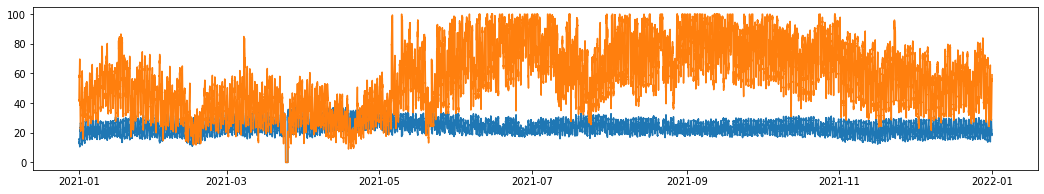

In [164]:
fig, ax = plt.subplots(figsize = (18,3)) 
ax.plot(df.Tamb)
ax.plot(df.Hum)

In [165]:
df.Ig = df.Ig*1/6

''

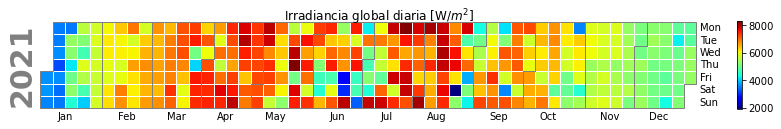

In [166]:
calplot.calplot(df.Ig, cmap = "jet", suptitle="Irradiancia global diaria [W/$m^2$]")
;

''

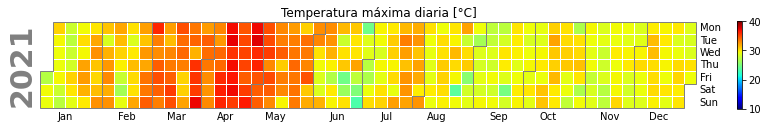

In [167]:
calplot.calplot(df.Tamb, how="max", cmap ="jet", vmin=10, vmax=40, suptitle="Temperatura máxima diaria [°C]")
;

''

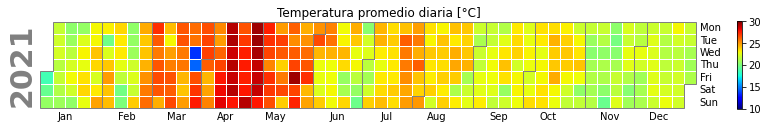

In [168]:
calplot.calplot(df.Tamb, how="mean", cmap ="jet", vmin=10, vmax=30, suptitle="Temperatura promedio diaria [°C]")
;

''

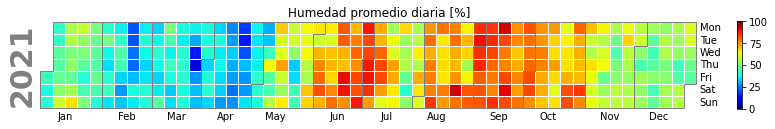

In [169]:
calplot.calplot(df.Hum, how="mean", cmap ="jet", vmin=0, vmax=100, suptitle="Humedad promedio diaria [%]")
;

Text(0.5, 0, 'Fecha [yy-mm]')

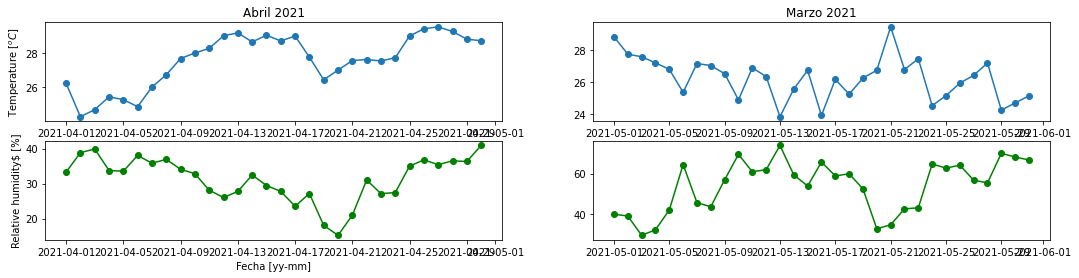

In [198]:
fig, ax = plt.subplots(2,2,figsize = (18,4)) 
ax[0][0].plot(df.Tamb.loc["2021-04"].resample("D").mean(), "o-")
ax[1][0].plot(df.Hum.loc["2021-04"].resample("D").mean(), "o-g")
ax[0][1].plot(df.Tamb.loc["2021-05"].resample("D").mean(), "o-")
ax[1][1].plot(df.Hum.loc["2021-05"].resample("D").mean(), "o-g")


ax[0][0].set_ylabel("Temperature [$^oC$]")
ax[1][0].set_ylabel("Relative humidity$ [%]")

ax[0][0].set_title("Abril 2021")
ax[0][1].set_title("Marzo 2021")

ax[1][0].set_xlabel("Fecha [yy-mm]")
ax[0][1].set_xlabel("Fecha [yy-mm]")


In [199]:
f    = "../data/temixco2021"
df   = pd.read_csv(f, index_col=0, parse_dates=True)
Tamb = df.Tamb.groupby(by=[df.index.month, df.index.hour]).mean().unstack().T
Hum  = df.Hum.groupby(by=[df.index.month, df.index.hour]).mean().unstack().T
Ig   = df.Ig.groupby(by=[df.index.month, df.index.hour]).mean().unstack().T

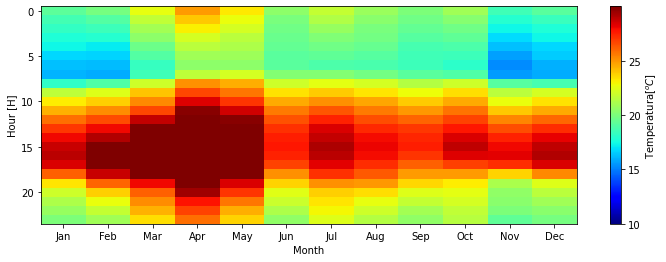

In [200]:
meses = calendar.month_abbr[1:]

fig, ax = plt.subplots(figsize = (12,4))

p = ax.imshow(Tamb, aspect="auto", cmap="jet", vmin=10, vmax=30)

ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)

ax.set_ylabel("Hour [H]")
ax.set_xlabel("Month")


fig.colorbar(p, label="Temperatura[$^oC$]", ticks=range(5,26,5))

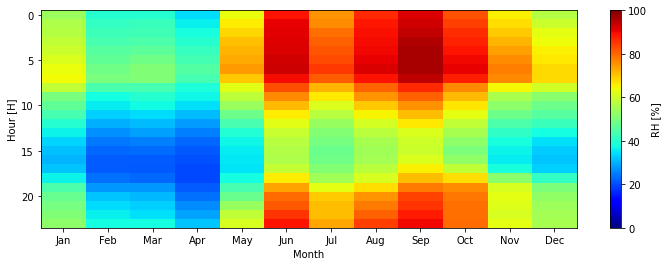

In [201]:
fig, ax = plt.subplots(figsize = (12,4))

p = ax.imshow(Hum, aspect="auto", cmap="jet", vmin=0, vmax=100)

ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)

ax.set_ylabel("Hour [H]")
ax.set_xlabel("Month")


fig.colorbar(p, label="RH [%]", ticks=range(0,101,20))

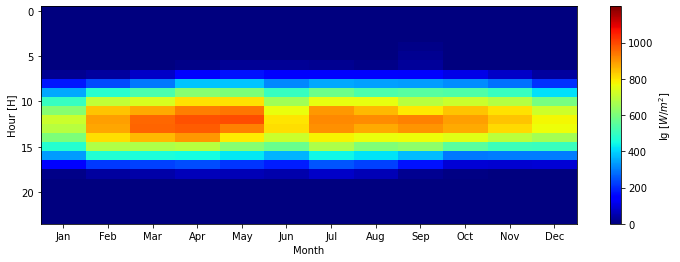

In [202]:
fig, ax = plt.subplots(figsize = (12,4))

p = ax.imshow(Ig, aspect="auto", cmap="jet", vmin=0, vmax=1200)

ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)

ax.set_ylabel("Hour [H]")
ax.set_xlabel("Month")


fig.colorbar(p, label="Ig [$W/m^2$]", ticks=range(0,1101,200))